# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [3]:
df = pd.read_csv('sinasc_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [46]:
nivel = [-1, 3, 5, 7, 10]
categoria = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Categoriza a variável APGAR5
df['APGAR5_CAT'] = pd.cut(df['APGAR5'], bins=nivel, labels=categoria, right=True)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

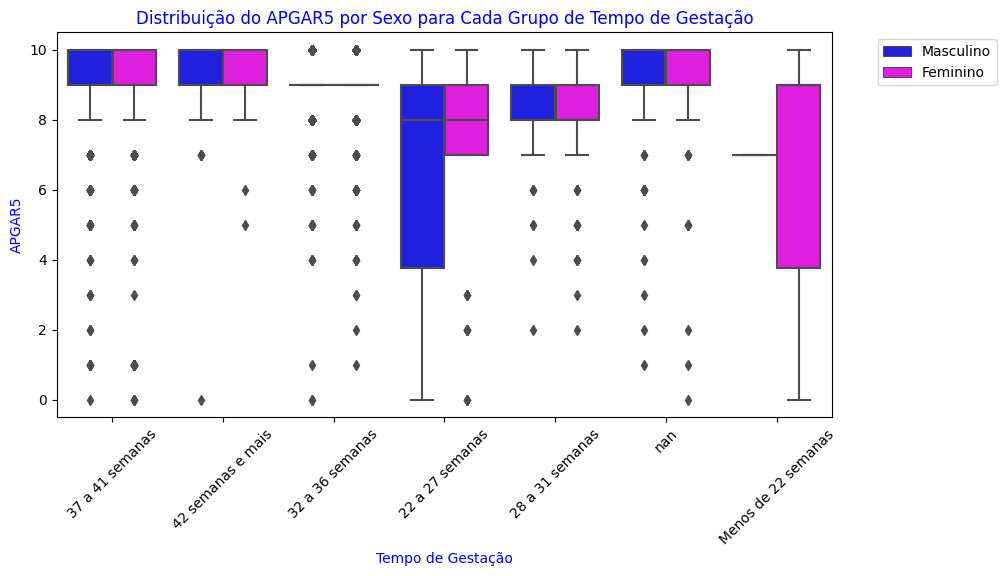

In [58]:
# Boxplot comparando a distribuição do APGAR5 por sexo para cada grupo de tempo de gestação

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df, palette={'Masculino': 'blue', 'Feminino': 'magenta'}, ax=ax)
ax.set_title('Distribuição do APGAR5 por Sexo para Cada Grupo de Tempo de Gestação', color = 'blue')
ax.set_xlabel('Tempo de Gestação', color = 'blue')
ax.set_ylabel('APGAR5', color = 'blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # para colocar a legenda fora do gráfico


plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [17]:
# Tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas
cross_tab = pd.crosstab(df['GESTACAO'], df['APGAR5'])
cross_tab

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1
nan,1,2,2,1,2,5,7,7,86,704,399


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [19]:
# Percentuais de linha
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28 a 31 semanas,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32 a 36 semanas,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37 a 41 semanas,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42 semanas e mais,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424
Menos de 22 semanas,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,42.857143,14.285714
nan,0.082237,0.164474,0.164474,0.082237,0.164474,0.411184,0.575658,0.575658,7.072368,57.894737,32.812500


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

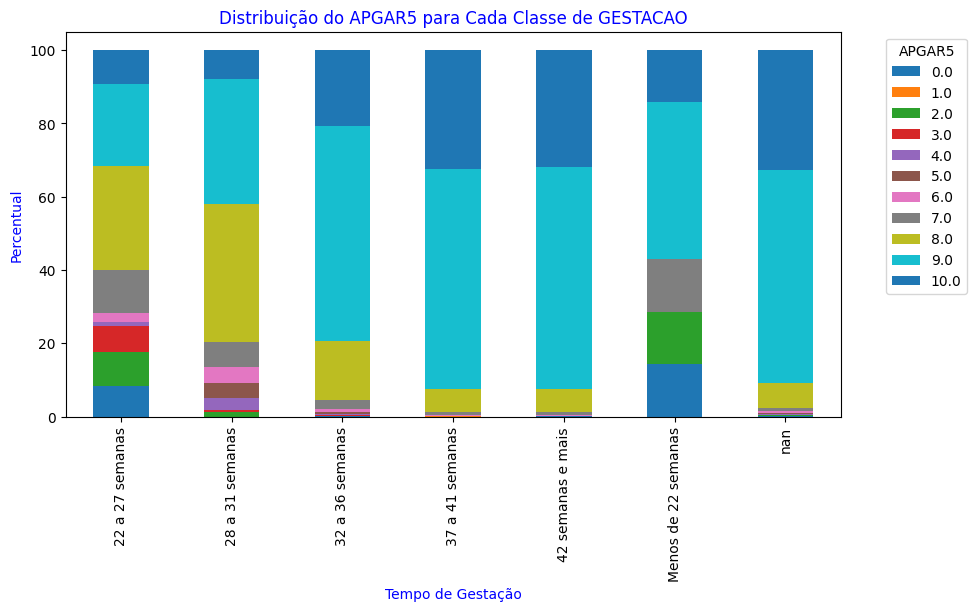

In [56]:
# Gráfico de barras da tabela cruzada
ax = cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Distribuição do APGAR5 para Cada Classe de GESTACAO', color = 'blue')
plt.xlabel('Tempo de Gestação', color = 'blue')
plt.ylabel('Percentual', color = 'blue')
ax.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left') # Para colocar a legenda para fora do gráfico
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

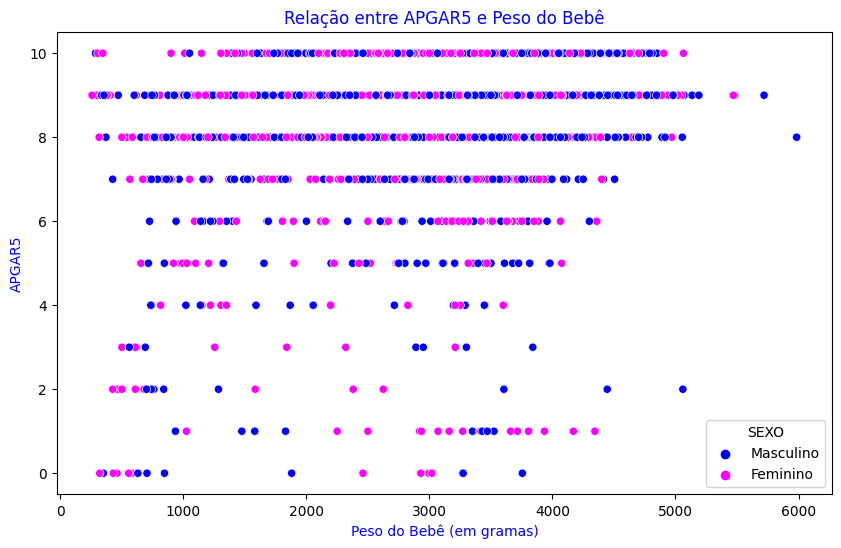

In [59]:
# Gráfico de dispersão do APGAR5 e do peso do bebê, colorindo os pontos por SEXO
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PESO', y='APGAR5', hue='SEXO', data=df, palette={'Masculino': 'blue', 'Feminino': 'magenta'})
plt.title('Relação entre APGAR5 e Peso do Bebê', color = 'blue')
plt.xlabel('Peso do Bebê (em gramas)', color = 'blue')
plt.ylabel('APGAR5', color = 'blue')
plt.show()

Realizado no primeiro e no quinto minuto de vida da criança, o teste APGAR5 baseia-se em cinco critérios de avaliação: frequência cardíaca, respiração, tônus muscular, prontidão reflexa e cor da pele, que, individualmente, podem receber notas de 0 a 2, somando um total de 10 pontos.
Uma maneira de verificar a relação entre o APGAR5 e o peso do bebê é através de um gráfico de dispersão. No gráfico de dispersão, o peso do bebê foi plotado no eixo x e o APGAR5 no eixo y. Cada ponto no gráfico representa um bebê.



> Verificando a relação entre o APGAR5 e o peso do bebê, no padrão encontrado no gráfico de dispersão, nota-se que as maiores pontuações de APGAR5 são de bebês que nascem com mais de 1Kg e menos que 5Kg.


